## Data Cleaning

### Importing all the required libraries for all the tasks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import ast
import datetime as dt
import networkx as nx
from sklearn.linear_model import LinearRegression

In [ ]:
pd.set_option('display.max_colwidth', -1)

### Reading all the csv files for all the tasks

In [316]:
dirty_data = pd.read_csv('Group055_dirty_data.csv')
branches = pd.read_csv('branches.csv')
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')
out_data = pd.read_csv('Group055_outlier_data.csv')
missing_data = pd.read_csv('Group055_missing_data.csv')

### First we will find what items are served for breakfast,lunch and dinner. Then we will cacluate the prices for each of the items <br>
In order to do this we will use the outlier's dataset as it does not have anomalies related to wrong or missing values

In [216]:
out_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.5,-37.802734,144.963243,0,6.998,13.003546
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.8,-37.802782,144.947353,0,8.932,16.413276
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.8,-37.811629,145.011572,0,12.045,16.714645
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.0,-37.818300,144.996805,0,9.837,16.489415
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.8,-37.819764,144.981426,0,8.901,12.056015


In [ ]:
# outlier_data[outlier_data['order_type']=='Breakfast']
# outlier_data[outlier_data['order_type']=='Lunch']
# outlier_data[outlier_data['order_type']=='Dinner']

**Breakfast items** are Cereal,Coffee,Eggs and Pancake <br>
**Lunch items** are Steak,Chicken,Salad,Burger and Fries <br>
**Dinner items** are Pasta,Shrimp,Salmon and Fish&chips

#### For each order_type we will extract as many (order_items,order_price) as the number of unique order items(because n variables need n equations for solving) <br>
Number of unique items for breakfast is 4 <br>
Number of unique items for lunch is 5 <br>
Number of unique items for dinner is 4

### Calculating prices of all the BREAKFAST items

In [397]:
# extarct data from four observations to form 4 equations
count = 0
bf_items_price = []
for i in range(len(outlier_data)):
    each = outlier_data.iloc[i]
    if each.order_type=='Breakfast' and len(each.order_items.split('),'))==4 and count<4:
        bf_items_price.append((each.order_items,each.order_price))
        count+=1
    else:
        pass

In [398]:
bf_items_price

[("[('Coffee', 9), ('Cereal', 9), ('Eggs', 9), ('Pancake', 10)]", 697.0),
 ("[('Eggs', 6), ('Pancake', 7), ('Coffee', 3), ('Cereal', 1)]", 345.25),
 ("[('Eggs', 4), ('Pancake', 2), ('Coffee', 5), ('Cereal', 4)]", 258.0),
 ("[('Eggs', 4), ('Cereal', 1), ('Pancake', 6), ('Coffee', 7)]", 307.0)]

**Let's define our equation for breakfast to be of type** <br>
**a\*Coffee + b\*Cereal + c\*Eggs + d\*Pancake = Total_cost**

In [399]:
coffee_pattern = re.compile('\'Coffee\', ([\d])')
cereal_pattern = re.compile('\'Cereal\', ([\d]+)')
eggs_pattern = re.compile('\'Eggs\', ([\d]+)')
pancake_pattern = re.compile('\'Pancake\', ([\d]+)')
four_eq_coeff = []
four_dep_values = []
for each in bf_items_price:
    each_eq_coeff = []
    items,price =each
    coffee_count = int(''.join(re.findall(coffee_pattern,items)))
    cereal_count = int(''.join(re.findall(cereal_pattern,items)))
    eggs_count = int(''.join(re.findall(eggs_pattern,items)))
    pancake_count = int(''.join(re.findall(pancake_pattern,items)))
    four_eq_coeff.append([coffee_count,cereal_count,eggs_count,pancake_count])
    four_dep_values.append(price)
    
a = np.array(four_eq_coeff)
b = np.array(four_dep_values)
x = np.linalg.solve(a,b)
x

array([ 7.5 , 21.  , 22.  , 24.25])

In [400]:
coffee_price = x[0]
cereal_price = x[1]
eggs_price = x[2]
pancake_price = x[3]

### Calculating prices of all the LUNCH items

In [401]:
# extarct data from five observations to form 5 equations
count = 0
lunch_items_price = []
for i in range(len(outlier_data)):
    each = outlier_data.iloc[i]
    if each.order_type=='Lunch' and len(each.order_items.split('),'))==5 and count<5:
        lunch_items_price.append((each.order_items,each.order_price))
        count+=1
    else:
        pass

In [402]:
lunch_items_price

[("[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",
  831.8),
 ("[('Burger', 3), ('Fries', 8), ('Steak', 8), ('Salad', 7), ('Chicken', 10)]",
  989.4),
 ("[('Chicken', 9), ('Burger', 9), ('Fries', 2), ('Salad', 8), ('Steak', 1)]",
  773.6),
 ("[('Chicken', 5), ('Burger', 8), ('Fries', 8), ('Steak', 8), ('Salad', 5)]",
  950.0),
 ("[('Steak', 3), ('Salad', 8), ('Burger', 6), ('Chicken', 1), ('Fries', 6)]",
  562.6)]

**Let's define our equations for lunch menu to be of type <br>
a\*Steak + b\*Chicken + c\*Salad + d\*Burger + e\*Fries = Total_cost**

In [403]:
steak_pattern = re.compile('\'Steak\', ([\d])')
chicken_pattern = re.compile('\'Chicken\', ([\d]+)')
salad_pattern = re.compile('\'Salad\', ([\d]+)')
burger_pattern = re.compile('\'Burger\', ([\d]+)')
fries_pattern = re.compile('\'Fries\', ([\d]+)')
five_eq_coeff = []
five_dep_values = []
for each in lunch_items_price:
    each_eq_coeff = []
    items,price =each
    steak_count = int(''.join(re.findall(steak_pattern,items)))
    chicken_count = int(''.join(re.findall(chicken_pattern,items)))
    salad_count = int(''.join(re.findall(salad_pattern,items)))
    burger_count = int(''.join(re.findall(burger_pattern,items)))
    fries_count = int(''.join(re.findall(fries_pattern,items)))
    five_eq_coeff.append([steak_count,chicken_count,salad_count,burger_count,fries_count])
    five_dep_values.append(price)
    
a = np.array(five_eq_coeff)
b = np.array(five_dep_values)
y = np.linalg.solve(a,b)
y

array([45. , 32. , 17.2, 31. , 12. ])

In [404]:
steak_price = y[0]
chicken_price = y[1]
salad_price = y[2]
burger_price = y[3]
fries_price = y[4]

### Calculating prices of all the DINNER items

In [405]:
# extarct data from four observations to form 4 equations
count = 0
dinner_items_price = []
for i in range(len(outlier_data)):
    each = outlier_data.iloc[i]
    if each.order_type=='Dinner' and len(each.order_items.split('),'))==4 and count<4:
        dinner_items_price.append((each.order_items,each.order_price))
        count+=1
    else:
        pass

In [406]:
dinner_items_price

[("[('Salmon', 7), ('Shrimp', 5), ('Fish&Chips', 1), ('Pasta', 6)]", 757.0),
 ("[('Shrimp', 10), ('Fish&Chips', 6), ('Salmon', 8), ('Pasta', 5)]", 1215.5),
 ("[('Shrimp', 2), ('Fish&Chips', 5), ('Salmon', 1), ('Pasta', 9)]", 571.5),
 ("[('Salmon', 6), ('Fish&Chips', 6), ('Pasta', 6), ('Shrimp', 9)]", 1107.0)]

**Let's define our equations for dinner menu to be of type <br>
a\*Salmon + b\*Shrimp + c\*Fish&Chips + d\*Pasta = Total_cost**

In [407]:
salmon_pattern = re.compile('\'Salmon\', ([\d])')
shrimp_pattern = re.compile('\'Shrimp\', ([\d]+)')
fish_chips_pattern = re.compile('\'Fish&Chips\', ([\d]+)')
pasta_pattern = re.compile('\'Pasta\', ([\d]+)')
four_eq_coeff = []
four_dep_values = []
for each in dinner_items_price:
    each_eq_coeff = []
    items,price =each
    salmon_count = int(''.join(re.findall(salmon_pattern,items)))
    shrimp_count = int(''.join(re.findall(shrimp_pattern,items)))
    fish_chips_count = int(''.join(re.findall(fish_chips_pattern,items)))
    pasta_count = int(''.join(re.findall(pasta_pattern,items)))
    four_eq_coeff.append([salmon_count,shrimp_count,fish_chips_count,pasta_count])
    four_dep_values.append(price)
    
a = np.array(four_eq_coeff)
b = np.array(four_dep_values)
z = np.linalg.solve(a,b)
z

array([41. , 54. , 35. , 27.5])

In [408]:
salmon_price = z[0]
shrimp_price = z[1]
fish_chips_price = z[2]
pasta_price = z[3]

### 1) Date Anomalies

In [409]:
dirty_data.date[0:10]

0    2018-06-26
1    2018-09-18
2    2018-09-12
3    2018-07-14
4    2018-03-14
5    2018-04-30
6    2018-02-12
7    2018-01-13
8    2018-02-13
9    07-03-2018
Name: date, dtype: object

We can see there are inconsistencies in the dates. With some dates the yyyy-mm--dd format is not followed and for some incorrect values are entered for months and days <BR>
BK has 10 of the wrong format dates <BR>
NS has 6 <br>
TP has 2

In [410]:
pattern_1 = re.compile('[\d]{4}-[\d]{2}-[\d]{2}')
pattern_2 = re.compile('[12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01])')
for i in range(len(dirty_data)):
    each= dirty_data.iloc[i]
    
    if not re.match(pattern_1,each.date):
        date = each.date
        date_split = date.split('-')
        correct_date = date_split[2] + '-' + date_split[1] + '-' + date_split[0]
        dirty_data.iloc[i,dirty_data.columns.get_loc('date')] = correct_date
        
    elif not re.match(pattern_2,each.date):
        date = each.date
        date_split = date.split('-')
        correct_date = date_split[0] + '-' + date_split[2] + '-' + date_split[1]
        dirty_data.iloc[i,dirty_data.columns.get_loc('date')] = correct_date

### 2) Branch Code Anomalies

In [411]:
dirty_data.branch_code.value_counts()

BK    173
TP    171
NS    127
ns    12 
tp    10 
bk    7  
Name: branch_code, dtype: int64

BK and bk represent same branches. Similarly TP and tp, and NS and ns represent same branches

In [412]:
for i in range(len(dirty_data)):
    each_row = dirty_data.iloc[i]
    if each_row.branch_code == 'ns':
        dirty_data.iloc[i,dirty_data.columns.get_loc('branch_code')] = 'NS'
    elif each_row.branch_code == 'tp':
        dirty_data.iloc[i,dirty_data.columns.get_loc('branch_code')] = 'TP'
    elif each_row.branch_code == 'bk':
        dirty_data.iloc[i,dirty_data.columns.get_loc('branch_code')] = 'BK'

Fixing further branch_code anomalies
* We have used outliers data for this
* If we run the below code we can see that each order_id has a unique character that corresponds to a particular barnch
* Using this we have fixed the branch_code

In [413]:
tp_set = set()
ns_set = set()
bk_set = set()
for i in range(len(outlier_data)):
    each = outlier_data.iloc[i]
    if each.branch_code=='TP':
        tp_set.add(each.order_id[3:4])
    elif each.branch_code=='NS':
        ns_set.add(each.order_id[3:4])
    elif each.branch_code=='BK':
        bk_set.add(each.order_id[3:4])
    
print('For TP branch_code',list(tp_set))    
print('For NS branch_code',list(ns_set))  
print('For BK branch_code',list(bk_set))   

For TP branch_code ['Y', 'B', 'J']
For NS branch_code ['C', 'I', 'Z']
For BK branch_code ['K', 'X', 'A']


In [414]:
for i in range(len(dirty_data)):
    each = dirty_data.iloc[i]
    if each.order_id[3:4] in list(tp_set):
        dirty_data.iloc[i,dirty_data.columns.get_loc('branch_code')] = 'TP'
    elif each.order_id[3:4] in list(ns_set):
        dirty_data.iloc[i,dirty_data.columns.get_loc('branch_code')] = 'NS'
    elif each.order_id[3:4] in list(bk_set):
        dirty_data.iloc[i,dirty_data.columns.get_loc('branch_code')] = 'BK' 

In [415]:
dirty_data.branch_code.value_counts()

TP    186
BK    180
NS    134
Name: branch_code, dtype: int64

* Number of TP increased by 5
* Number of NS decreased by 5
* No changes in BK

### 3) Time and order_type anomalies <br>
Breakfast timing = 8am-12pm<br>
Lunch timing = 12:00:01pm - 4pm or 12:00:01 - 16:00<br>
Dinner timing = 4:00:01pm - 8pm or 16:00:01 - 20:00:00

In [416]:
dirty_data[['time','order_type']][0:5]

,time,order_type
0,13:44:47,Lunch
1,16:37:10,Lunch
2,16:27:02,Dinner
3,14:25:21,Lunch
4,10:21:58,Breakfast


We can see that some of the order_types are not according to the time. So we change the incorrect order_types to correct one's

In [417]:
# creating three new columns as hour, minute and seconds
dirty_data['hour'] = pd.to_datetime(dirty_data['time'], format='%H:%M:%S').dt.hour
dirty_data['minute'] = pd.to_datetime(dirty_data['time'], format='%H:%M:%S').dt.minute
dirty_data['second'] = pd.to_datetime(dirty_data['time'], format='%H:%M:%S').dt.second

In [418]:
dirty_data.head(1)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.4,-37.825836,144.984425,0,8.92,12.345871,13,44,47


In [419]:
# for loop iterates through all the observations and sets the order type according to the time of order
for i in range(len(dirty_data)):
    each_row = dirty_data.iloc[i]
    if (each_row.hour in range(8,12)) or ((each_row.hour==12 and each_row.minute==0) and each_row.second==0):
        dirty_data.iloc[i,dirty_data.columns.get_loc('order_type')] = 'Breakfast'
    elif (each_row.hour in range(13,16)) or ((each_row.hour==12) and (each_row.minute>0 or each_row.second>0)) or ((each_row.hour==16 and each_row.minute==0) and each_row.second==0):
        dirty_data.iloc[i,dirty_data.columns.get_loc('order_type')] = 'Lunch'
    else:
        dirty_data.iloc[i,dirty_data.columns.get_loc('order_type')] ='Dinner'    

In [420]:
dirty_data.head(1)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.4,-37.825836,144.984425,0,8.92,12.345871,13,44,47


### 4) order_items anomalies

In [421]:
dirty_data.iloc[465:466]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second
465,ORDA06851,2018-01-21,08:30:25,Breakfast,BK,"[('Fish&Chips', 10), ('Coffee', 3), ('Cereal', 8)]",410.5,-37.799968,144.97146,0,7.582,15.028301,8,30,25


As we can see in the above result observation number 465, an item from dinner has been added to breakfast.We will be writing a code to rectify such errors

In [422]:
# defining menu's for three order types
breakfast_items=['Cereal', 'Coffee', 'Eggs', 'Pancake']
lunch_items = ['Steak', 'Chicken', 'Salad', 'Burger', 'Fries']
dinner_items = ['Pasta', 'Shrimp', 'Salmon','Fish&Chips']

In [423]:
# initialised a dictionary to store item names and respective prices
item_price_dict = {'Coffee':coffee_price,'Cereal':cereal_price,'Eggs':eggs_price,'Pancake':pancake_price,
                   'Steak':steak_price,'Chicken':chicken_price,'Salad':salad_price,'Burger':burger_price,'Fries':fries_price,
                  'Salmon':salmon_price,'Shrimp':shrimp_price,'Fish&Chips':fish_chips_price,'Pasta':pasta_price}

In [424]:
# here we iterate through each row and extarct the order_items. Next is converting them into list.
#on each iteration over the list we check if the item is present in the defined item list. The price for correct items is
# calculated and over that value we calculate the price value of the wrong item.Based on this price we predict the 
# correct item. 

for i in range(len(dirty_data)):
    each = dirty_data.iloc[i]
    if each.order_type == 'Breakfast':
        items_tuple_list = ast.literal_eval(each.order_items)
        to_keep_tuple_list = []
        to_change_tuple_list = []
        items_price = 0
        for each_tuple in items_tuple_list:     # list of order item tuple
            item,quantity = each_tuple          # unpacking the tuple into order qty and item
            if item in breakfast_items:
                item,quantity = each_tuple
                price = item_price_dict[item]                 # finding price of the correct item from the dictionary
                items_price = items_price + (price*quantity)
                to_keep_tuple_list.append(each_tuple)          # list containing correct items
            else:
                to_change_tuple_list.append(each_tuple)
        total_order_price = each.order_price
        # code to check number of wrong items 
        if len(to_change_tuple_list)==0:
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_price')] = items_price
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_items')] = str(to_keep_tuple_list)
            
        else:
            for each in to_change_tuple_list:
                item,quantity = each
                actual_cost_of_to_change_item = round((total_order_price-items_price)/quantity,2)
                correct_item = ''.join([item for item, price in item_price_dict.items() if round(price,2) == actual_cost_of_to_change_item])
                new_tuple = (correct_item,quantity)
                to_keep_tuple_list.append(new_tuple)
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_items')] = str(to_keep_tuple_list)
        
        
    elif each.order_type == 'Lunch':
        items_tuple_list = ast.literal_eval(each.order_items)
        to_keep_tuple_list = []
        to_change_tuple_list = []
        items_price =0
        for each_tuple in items_tuple_list:
            item,quantity = each_tuple
            if item in lunch_items:
                item,quantity = each_tuple
                price = item_price_dict[item]
                items_price = items_price + (price*quantity)
                to_keep_tuple_list.append(each_tuple)
            else:
                to_change_tuple_list.append(each_tuple)
        total_order_price = each.order_price
        if len(to_change_tuple_list)==0:
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_price')] = items_price
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_items')] = str(to_keep_tuple_list)
        else:
            for each in to_change_tuple_list:
                item,quantity = each
                actual_cost_of_to_change_item = round((total_order_price-items_price)/quantity,2)
                correct_item = ''.join([item for item, price in item_price_dict.items() if round(price,2) == actual_cost_of_to_change_item])
                new_tuple = (correct_item,quantity)
                to_keep_tuple_list.append(new_tuple)
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_items')] = str(to_keep_tuple_list)
        
     
    elif each.order_type == 'Dinner':
        items_tuple_list = ast.literal_eval(each.order_items)
        to_keep_tuple_list = []
        to_change_tuple_list = []
        items_price=0
        for each_tuple in items_tuple_list:
            item,quantity = each_tuple
            if item in dinner_items:
                item,quantity=each_tuple
                price =item_price_dict[item]
                items_price = items_price + (price*quantity)
                to_keep_tuple_list.append(each_tuple)
            else:
                to_change_tuple_list.append(each_tuple)
        total_order_price = each.order_price
        if len(to_change_tuple_list)==0:
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_price')] = items_price
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_items')] = str(to_keep_tuple_list)
        else:
            for each in to_change_tuple_list:
                item,quantity = each
                actual_cost_of_to_change_item = round((total_order_price-items_price)/quantity,2)
                correct_item = ''.join([item for item, price in item_price_dict.items() if round(price,2) == actual_cost_of_to_change_item])
                new_tuple = (correct_item,quantity)
                to_keep_tuple_list.append(new_tuple)
            dirty_data.iloc[i,dirty_data.columns.get_loc('order_items')] = str(to_keep_tuple_list)

#### CODE TO CHECK IF ALL INVALID order_items TUPLES HAVE BEEN REPLACED

In [425]:
tuples_wrong = []
index_w = []
for i in range(len(dirty_data)):
    each = dirty_data.iloc[i]
    items_tuple_list = ast.literal_eval(each.order_items)
    for each_tuple in items_tuple_list:
#         print(each_tuple_list)
        item,quantity = each_tuple
        if item =='':
            tuples_wrong.append(each_tuple)
            index_w.append(i)  
tuples_wrong

[]

### 5) CALCULATING DISTANCE_TO_CUSTOMER_KM

In [426]:
dirty_data[dirty_data['customer_lat']>38]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second
51,ORDI06318,2018-11-21,18:49:00,Dinner,NS,"[('Pasta', 7), ('Fish&Chips', 7), ('Salmon', 4), ('Shrimp', 1)]",655.5,144.929727,-37.803039,0,10.052,16.189595,18,49,0
139,ORDA09171,2018-07-30,14:55:46,Lunch,BK,"[('Steak', 1), ('Fries', 10), ('Salad', 1), ('Burger', 1)]",213.2,144.972355,-37.809612,0,6.734,12.530766,14,55,46
402,ORDX03132,2018-12-16,19:29:34,Dinner,BK,"[('Salmon', 6), ('Pasta', 4), ('Fish&Chips', 4), ('Shrimp', 9)]",982.0,144.944631,-37.824398,0,9.796,19.213854,19,29,34
470,ORDK03590,2018-10-15,17:27:53,Dinner,BK,"[('Salmon', 6), ('Fish&Chips', 8), ('Pasta', 8)]",746.0,144.989988,-37.814678,0,5.466,12.704516,17,27,53


From the above observations we can see that some values of customer_lat have wrong signs i.e they should be negative while some values from customer_lon have been wrongly inserted into customer_lat. <br>
* We will start by swapping the wrongly misplaced customer_lon values with customer_lat values
* Next we will change the sign of positive customer_lat to negative

In [427]:
for i in range(len(dirty_data)):
    each = dirty_data.iloc[i]
    if each.customer_lat>38:
        new_lat = each.customer_lon
        new_lon = each.customer_lat
        dirty_data.iloc[i,dirty_data.columns.get_loc('customer_lat')] = new_lat
        dirty_data.iloc[i,dirty_data.columns.get_loc('customer_lon')] = new_lon
        
for i in range(len(dirty_data)):
    each = dirty_data.iloc[i]    
    if each.customer_lat>0:
        current_lat = each.customer_lat
        sign_changed_lat = (current_lat*(-1))
        dirty_data.iloc[i,dirty_data.columns.get_loc('customer_lat')] = sign_changed_lat  

In [428]:
dirty_data[dirty_data['customer_lat']>38]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second


**Next step is to calculate the shortest between customer and the branch he order's from**

In [429]:
G = nx.Graph()
for i in range(len(edges)):
    each = edges.iloc[i]
    G.add_edge(each.u,each.v,weight = each['distance(m)'])

In [155]:
G.number_of_edges()

25491

In [156]:
G.number_of_nodes()

17117

Calculating the shortest distance between the branch and customer

In [430]:
for i in range(len(dirty_data)):
    each_row = dirty_data.iloc[i]
    branch_code = each_row.branch_code
    branch_lat = float(branches[branches.branch_code==branch_code].branch_lat.values[0])
    branch_lon = float(branches[branches.branch_code==branch_code].branch_lon.values[0])
    start_node = nodes[(nodes.lat==branch_lat) & (nodes.lon==branch_lon)].node.values[0]
    
    customer_lat = float(round(each_row.customer_lat,7))
    customer_lon = float(round(each_row.customer_lon,7))
    end_node = float(nodes[(round(nodes.lat,7)==customer_lat) & (round(nodes.lon,7)==customer_lon)].node.values[0]) 
    shortest_path = round(nx.dijkstra_path_length(G,start_node,end_node)/1000,3)
    dirty_data.iloc[i,dirty_data.columns.get_loc('distance_to_customer_KM')] = shortest_path

In [431]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.4,-37.825836,144.984425,0,8.920,12.345871,13,44,47
1,ORDI04117,2018-09-18,16:37:10,Dinner,NS,"[('Fish&Chips', 4), ('Salmon', 2)]",222.0,-37.807924,144.949274,0,8.655,13.999522,16,37,10
2,ORDX04240,2018-09-12,16:27:02,Dinner,BK,"[('Fish&Chips', 10), ('Pasta', 8)]",570.0,-37.800029,144.999944,0,5.311,12.131518,16,27,2
3,ORDI00291,2018-07-14,14:25:21,Lunch,NS,"[('Chicken', 10), ('Burger', 9), ('Salad', 4), ('Steak', 9), ('Fries', 4)]",1120.8,-37.822184,144.947702,0,9.951,17.291598,14,25,21
4,ORDB06629,2018-03-14,10:21:58,Breakfast,TP,"[('Eggs', 6), ('Coffee', 3)]",154.5,-37.799048,144.932417,0,12.321,14.528188,10,21,58


# MISSING DATA

In [317]:
missing_data.head(2)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDZ04713,2018-01-20,08:30:25,Breakfast,NS,"[('Cereal', 3), ('Eggs', 3)]",129.0,-37.804112,144.973937,0,6.671,13.167739
1,ORDC04664,2018-11-28,18:59:09,Dinner,NS,"[('Salmon', 8), ('Pasta', 5), ('Fish&Chips', 6), ('Shrimp', 10)]",1215.5,-37.816644,144.976307,0,8.297,14.251903


In [318]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [319]:
missing_data.describe(include='all')

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500,500,500,500,400,500,500.000000,500.000000,500.000000,500.000000,450.000000,450.000000
unique,500,278,72,3,3,496,NaN,NaN,NaN,NaN,NaN,NaN
top,ORDZ06667,2018-03-08,10:11:49,Breakfast,TP,"[('Coffee', 6), ('Pancake', 6)]",NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,15,179,138,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,484.674300,-37.812350,144.967075,0.072000,8.705178,13.712899
std,NaN,NaN,NaN,NaN,NaN,NaN,275.187488,0.007609,0.021620,0.258747,1.635423,2.635046
min,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,-37.833683,144.916624,0.000000,3.322000,4.696466
25%,NaN,NaN,NaN,NaN,NaN,NaN,275.800000,-37.818759,144.952759,0.000000,7.775250,12.610560
50%,NaN,NaN,NaN,NaN,NaN,NaN,417.625000,-37.812380,144.964549,0.000000,8.736000,13.912967
75%,NaN,NaN,NaN,NaN,NaN,NaN,652.750000,-37.806136,144.982735,0.000000,9.729500,15.355858


In [320]:
missing_data.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,400,500
unique,500,278,72,3,3,496
top,ORDZ06667,2018-03-08,10:11:49,Breakfast,TP,"[('Coffee', 6), ('Pancake', 6)]"
freq,1,6,15,179,138,2


In [321]:
missing_data.isnull().sum()

order_id                   0  
date                       0  
time                       0  
order_type                 0  
branch_code                100
order_items                0  
order_price                0  
customer_lat               0  
customer_lon               0  
customerHasloyalty?        0  
distance_to_customer_KM    50 
delivery_fee               50 
dtype: int64

Null values across the dataframe:
* 100 null values for column branch_code
* 50 null values for distance_to_customer_KM column
* 50 null values for delivery_fee column

First we will deal with all the branch_code missing values <br>
* Previously we figured out with the help of outlier data that each branch_code corresponds to a character given in the order_id
* We will use this relationship to find the branch_code

In [322]:
tp_set = set()
ns_set = set()
bk_set = set()
for i in range(len(outlier_data)):
    each = outlier_data.iloc[i]
    if each.branch_code=='TP':
        tp_set.add(each.order_id[3:4])
    elif each.branch_code=='NS':
        ns_set.add(each.order_id[3:4])
    elif each.branch_code=='BK':
        bk_set.add(each.order_id[3:4])
    
print('For TP branch_code',list(tp_set))    
print('For NS branch_code',list(ns_set))  
print('For BK branch_code',list(bk_set)) 

For TP branch_code ['Y', 'B', 'J']
For NS branch_code ['C', 'I', 'Z']
For BK branch_code ['K', 'X', 'A']


Order_id associated with each order is of the format ("ORD" + a character + 5-digits) e.g ORD**C**07657 <br>
The above code gives us following information:
* For branch_code TP, the charcter is one of the ['B', 'J', 'Y']
* For branch_code NS, the character is one of the ['I', 'C', 'Z']
* For branch_code BK, the character is one of the ['K', 'X', 'A']

In [323]:
# lists containing the characters for each branch_code
char_list_TP = list(tp_set)
char_list_NS = list(ns_set)
char_list_BK = list(bk_set)

In [324]:
for i in range(len(missing_data)):
    each= missing_data.iloc[i]
    order_char = each.order_id[3:4]
    if order_char in char_list_TP:
        missing_data.iloc[i,missing_data.columns.get_loc('branch_code')] = 'TP'
    elif order_char in char_list_NS:
        missing_data.iloc[i,missing_data.columns.get_loc('branch_code')] = 'NS'
    elif order_char in char_list_BK:
        missing_data.iloc[i,missing_data.columns.get_loc('branch_code')] = 'BK'

In [325]:
# checking the values after correcting the missing values
missing_data.branch_code.value_counts()

TP    171
BK    170
NS    159
Name: branch_code, dtype: int64

We can see that all the branch_code missing values have been filled with correct values

In [326]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


Now we will try to fix the distance_to_customer_KM column:
* It contains 50 missing values
* Approach will be to use Djikstra algorithm to calculate the shortest distance between customer and restraunt
* We will reuse the code used to fix dirty_data
* We have already created a nx.Graph() method and added all the edges to it
* Interating through all the rows in the missing_data we will use Graph() object to find the shortest distance

In [327]:
for i in range(len(missing_data)):
    each_row = missing_data.iloc[i]
    branch_code = each_row.branch_code
    branch_lat = float(branches[branches.branch_code==branch_code].branch_lat.values[0])
    branch_lon = float(branches[branches.branch_code==branch_code].branch_lon.values[0])
    start_node = nodes[(nodes.lat==branch_lat) & (nodes.lon==branch_lon)].node.values[0]
    
    customer_lat = float(round(each_row.customer_lat,7))
    customer_lon = float(round(each_row.customer_lon,7))
    end_node = float(nodes[(round(nodes.lat,7)==customer_lat) & (round(nodes.lon,7)==customer_lon)].node.values[0]) 
    shortest_path = round(nx.dijkstra_path_length(G,start_node,end_node)/1000,3)
    missing_data.iloc[i,missing_data.columns.get_loc('distance_to_customer_KM')] = shortest_path

**Now we will try to fix the delivery_fee column** <br>
Given that : 
* delivery_fee depends upon weekend or weekday as a continous variable
* time of day morning,afternoon or evening as a continous variabe
* distance between branch and customer  <br>
NOTE: The fee depends linearly on all above features but in different ways for each branch

First we will generate new features i.e weekend(1) or weekday(0) feature and time of day feature morning(0),afternoon(1) or evening(2)

Converting string date column into date type **:**

In [328]:
# convert date column into datetime using pandas to_datetime function
missing_data['date'] = pd.to_datetime(missing_data['date'],dayfirst=True)

In [329]:
# created a new column "day_of_week" to store name of the weekday
missing_data['day_of_week'] = missing_data['date'].dt.day_name()

* The below for loop will iterate through the missing data rows
* In each iteration we will try to replace the weekends i.e Saturday and Sunday with 0
* We will replace all other weekdays with 1

In [330]:
for i in range(len(missing_data)):
    each = missing_data.iloc[i]
    if each.day_of_week=='Saturday' or each.day_of_week=='Sunday':
        missing_data.iloc[i,missing_data.columns.get_loc('day_of_week')] = 0
    else:
        missing_data.iloc[i,missing_data.columns.get_loc('day_of_week')] = 1

Next we will try to assign unique index values for each time of day i.e morning,afternoon and evening
* We already know that breakfast corresponds to morning time, lunch to afternoon time and dinner with evening time
* So we will use the order_type column and generate a new column to store unique indexes for time of day
* 0 corresponds to morning, 1 to afternoon and 2 to evening

In [331]:
def getTimeOfDay (row):
    if row == "Breakfast":
        result1 = 0
    elif row == "Lunch":
        result1 = 1
    else:
        result1 = 2
    return result1

missing_data['TimeOfDay'] = missing_data.apply(lambda x: getTimeOfDay(x['order_type']), axis =1)

In [332]:
missing_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,day_of_week,TimeOfDay
0,ORDZ04713,2018-01-20,08:30:25,Breakfast,NS,"[('Cereal', 3), ('Eggs', 3)]",129.00,-37.804112,144.973937,0,6.671,13.167739,0,0
1,ORDC04664,2018-11-28,18:59:09,Dinner,NS,"[('Salmon', 8), ('Pasta', 5), ('Fish&Chips', 6), ('Shrimp', 10)]",1215.50,-37.816644,144.976307,0,8.297,14.251903,1,2
2,ORDC07657,2018-02-23,09:41:24,Breakfast,NS,"[('Eggs', 3), ('Pancake', 1), ('Coffee', 3)]",112.75,-37.806619,144.932422,0,10.183,15.208765,1,0
3,ORDC09481,2018-04-06,11:02:32,Breakfast,NS,"[('Coffee', 4), ('Pancake', 2), ('Eggs', 2)]",122.50,-37.802820,144.995686,0,8.487,13.543121,1,0
4,ORDB00204,2018-12-05,19:09:17,Dinner,TP,"[('Pasta', 4), ('Salmon', 6), ('Fish&Chips', 5), ('Shrimp', 10)]",1071.00,-37.820718,144.954738,0,8.231,13.090698,1,2
5,ORDB01589,2018-06-22,13:34:38,Lunch,TP,"[('Burger', 9), ('Fries', 4)]",327.00,-37.804374,145.001365,0,11.756,15.107788,1,1
6,ORDX04944,2018-04-07,11:02:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 10), ('Pancake', 2), ('Cereal', 4)]",412.50,-37.822702,145.007615,0,4.555,NaN,0,0
7,ORDX06289,2018-08-22,15:46:28,Lunch,BK,"[('Salad', 10), ('Steak', 9), ('Burger', 5), ('Fries', 3), ('Chicken', 3)]",864.00,-37.822553,144.940291,0,10.217,16.163045,1,1
8,ORDC09624,2018-07-17,14:25:21,Lunch,NS,"[('Salad', 3), ('Chicken', 4), ('Burger', 1), ('Fries', 6), ('Steak', 6)]",552.60,-37.806318,144.940461,0,10.235,15.699447,1,1
9,ORDC02404,2018-03-09,10:11:49,Breakfast,NS,"[('Coffee', 5), ('Pancake', 2), ('Cereal', 6), ('Eggs', 7)]",366.00,-37.806184,144.958842,0,7.694,12.909591,1,0


Since the given not null delivery_fee values are 1/2 where customer_loyalty is 1, we will generate a new column "new_delivery_fee" that stores the true values of the delivery_fee

In [333]:
new_delivery_fee=missing_data.delivery_fee.tolist()
missing_data['new_delivery_fee'] = new_delivery_fee
for i in range(len(missing_data)):
    each = missing_data.iloc[i]
    if each['customerHasloyalty?']==1:
        missing_data.iloc[i,missing_data.columns.get_loc('new_delivery_fee')] = (missing_data.new_delivery_fee.iloc[i])*2

In [334]:
missing_data[['customerHasloyalty?','delivery_fee','new_delivery_fee']][9:12]

,customerHasloyalty?,delivery_fee,new_delivery_fee
9,0,12.909591,12.909591
10,1,7.773982,15.547965
11,0,NaN,NaN


**Since the delivery_fee behaves differently for each branch,  we will divide the dataset into three parts. <br>
Each part will correspond to a single branch**

In [335]:
missing_data_TP = missing_data[missing_data.branch_code=='TP']

In [337]:
missing_data_TP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 4 to 498
Data columns (total 15 columns):
order_id                   171 non-null object
date                       171 non-null datetime64[ns]
time                       171 non-null object
order_type                 171 non-null object
branch_code                171 non-null object
order_items                171 non-null object
order_price                171 non-null float64
customer_lat               171 non-null float64
customer_lon               171 non-null float64
customerHasloyalty?        171 non-null int64
distance_to_customer_KM    171 non-null float64
delivery_fee               159 non-null float64
day_of_week                171 non-null int64
TimeOfDay                  171 non-null int64
new_delivery_fee           159 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 21.4+ KB


**Predicting missing delivery_fee values for branch TP using a linear regression model** <br>
* We have taken values where delivery_fee is not null as our train data
* Then we use the values where delivery_fee is null to test and predict respective values

In [338]:
tp_train_data_x = missing_data_TP[missing_data_TP['delivery_fee'].notnull()][['day_of_week','TimeOfDay','distance_to_customer_KM']]
tp_train_data_y = missing_data_TP[missing_data_TP['delivery_fee'].notnull()]['new_delivery_fee']

In [339]:
tp_test_data_x = missing_data_TP[missing_data_TP['delivery_fee'].isnull()][['day_of_week','TimeOfDay','distance_to_customer_KM']]

In [341]:
# tp_test_data_x

In [342]:
# missing_data_TP

**Now we will implement the linear regression on the above test and train data**

In [343]:
linear_model_tp = LinearRegression()

In [344]:
linear_model_tp.fit(tp_train_data_x,tp_train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [345]:
from sklearn.metrics import r2_score

In [346]:
r2_score(tp_train_data_y,linear_model_tp.predict(tp_train_data_x))

0.955003387997493

In [347]:
predicted_values = list(linear_model_tp.predict(tp_test_data_x))

In [348]:
predicted_values

[14.214320546282817,
 15.066205723156472,
 14.886405946819593,
 12.310119949729685,
 14.48866292801749,
 11.385299177319208,
 12.610803449949506,
 15.584003813467703,
 13.792412941502253,
 11.48068591312234,
 11.883336116468307,
 12.245121908518701]

Now we will update these values at their respective indexes in the missing_data dataframe

In [350]:
# missing_data

In [351]:
length = len(predicted_values)
start = 0
while start<length:
    for index in tp_test_data_x.index:
        each = missing_data.loc[index]
        if each['customerHasloyalty?']==1:
            missing_data.delivery_fee.loc[index]=predicted_values[start]*0.5
        else:
            missing_data.delivery_fee.loc[index]=predicted_values[start]
             
        start+=1

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [352]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
order_id                   500 non-null object
date                       500 non-null datetime64[ns]
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               462 non-null float64
day_of_week                500 non-null int64
TimeOfDay                  500 non-null int64
new_delivery_fee           450 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 58.7+ KB


We can see that some of the null values in the dataframe have been removed <br>
Similarly we will implement the same code for BK and NS

**Predicting missing delivery_fee values for branch BK using a linear regression model** <br>
* We have taken values where delivery_fee is not null as our train data
* Then we use the values where delivery_fee is null to test and predict respective values

In [353]:
missing_data_BK = missing_data[missing_data.branch_code=='BK']

In [354]:
bk_train_data_x = missing_data_BK[missing_data_BK['delivery_fee'].notnull()][['day_of_week','TimeOfDay','distance_to_customer_KM']]
bk_train_data_y = missing_data_BK[missing_data_BK['delivery_fee'].notnull()]['new_delivery_fee']

In [360]:
bk_test_data_x = missing_data_BK[missing_data_BK['delivery_fee'].isnull()][['day_of_week','TimeOfDay','distance_to_customer_KM']]

In [357]:
# bk_test_data_x

**Now we will implement the linear regression on the above test and train data**

In [361]:
linear_model_bk = LinearRegression()

In [362]:
linear_model_bk.fit(bk_train_data_x,bk_train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [372]:
r2_score(bk_train_data_y,linear_model_bk.predict(bk_train_data_x))

0.98121260839376

In [363]:
predicted_values_bk = list(linear_model_bk.predict(bk_test_data_x))

Now we will update these values at their respective indexes in the missing_data dataframe

In [364]:
length = len(predicted_values_bk)
start = 0
while start<length:
    for index in bk_test_data_x.index:
        each = missing_data.loc[index]
        if each['customerHasloyalty?']==1:
            missing_data.delivery_fee.loc[index]=predicted_values_bk[start]*0.5
        else:
            missing_data.delivery_fee.loc[index]=predicted_values_bk[start]
             
        start+=1

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [365]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
order_id                   500 non-null object
date                       500 non-null datetime64[ns]
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               482 non-null float64
day_of_week                500 non-null int64
TimeOfDay                  500 non-null int64
new_delivery_fee           450 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 58.7+ KB


Further missing values have been removed from the delivery_fee column

**Predicting missing delivery_fee values for branch NS using a linear regression model** <br>
* We have taken values where delivery_fee is not null as our train data
* Then we use the values where delivery_fee is null to test and predict respective values

In [366]:
missing_data_NS = missing_data[missing_data.branch_code=='NS']

In [367]:
ns_train_data_x = missing_data_NS[missing_data_NS['delivery_fee'].notnull()][['day_of_week','TimeOfDay','distance_to_customer_KM']]
ns_train_data_y = missing_data_NS[missing_data_NS['delivery_fee'].notnull()]['new_delivery_fee']

In [368]:
ns_test_data_x = missing_data_NS[missing_data_NS['delivery_fee'].isnull()][['day_of_week','TimeOfDay','distance_to_customer_KM']]

**Now we will implement the linear regression on the above test and train data**

In [369]:
linear_model_ns = LinearRegression()

In [370]:
linear_model_ns.fit(ns_train_data_x,ns_train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [373]:
r2_score(ns_train_data_y,linear_model_ns.predict(ns_train_data_x))

0.951874925075536

In [374]:
predicted_values_ns = list(linear_model_ns.predict(ns_test_data_x))

Now we will update these values at their respective indexes in the missing_data dataframe

In [375]:
length = len(predicted_values_ns)
start = 0
while start<length:
    for index in ns_test_data_x.index:
        each = missing_data.loc[index]
        if each['customerHasloyalty?']==1:
            missing_data.delivery_fee.loc[index]=predicted_values_ns[start]*0.5
        else:
            missing_data.delivery_fee.loc[index]=predicted_values_ns[start]
             
        start+=1

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [376]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
order_id                   500 non-null object
date                       500 non-null datetime64[ns]
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
day_of_week                500 non-null int64
TimeOfDay                  500 non-null int64
new_delivery_fee           450 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 58.7+ KB


Finally all the missing values from the column delivery_fee have been substituted with the predicted values

# OUTLIERS DATA

In [377]:
out_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.5,-37.802734,144.963243,0,6.998,13.003546
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.8,-37.802782,144.947353,0,8.932,16.413276
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.8,-37.811629,145.011572,0,12.045,16.714645
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.0,-37.818300,144.996805,0,9.837,16.489415
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.8,-37.819764,144.981426,0,8.901,12.056015


In [218]:
out_data['delivery_fee'].describe()

count    500.000000
mean     13.821945 
std      3.172955  
min      2.385770  
25%      12.467119 
50%      14.038030 
75%      15.527258 
max      26.609499 
Name: delivery_fee, dtype: float64

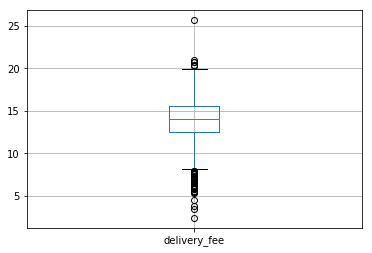

In [251]:
out_data.boxplot('delivery_fee')

In [220]:
out_data.branch_code.unique()

array(['NS', 'BK', 'TP'], dtype=object)

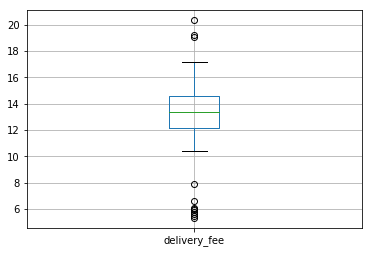

In [252]:
out_data[out_data.branch_code == 'TP'].boxplot('delivery_fee')

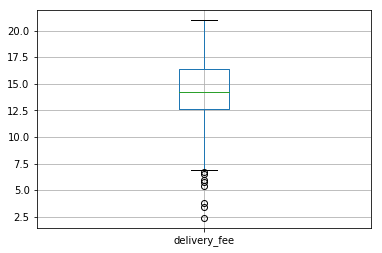

In [253]:
out_data[out_data.branch_code == 'BK'].boxplot('delivery_fee')

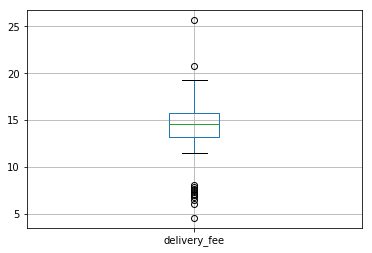

In [254]:
out_data[out_data.branch_code == 'NS'].boxplot('delivery_fee')

In order to remove the outliers from the delivery_fee column:
* We will reuse the trained linear regression models we built earlier
* The model was trained with the missing_data dataframe
* The model will be tested with features from the outlier data
* Then we will calculate the difference of delivery_fee i.e actual(missing_data) and predicted values(out_data)
* The residual from the two delivery_fee is used to calculate the outliers in our data set
* We will use the IQR with upper and lower bounds to remove the values

In [378]:
def getDayOfWeek(row):
    date = pd.to_datetime(row)
    day = date.dayofweek 
    if day > 4:
        result = 1
    else:
        result = 0
    return result

out_data['DayOfWeek'] = out_data.apply(lambda x: getDayOfWeek(x['date']), axis =1)
out_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,DayOfWeek
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.5,-37.802734,144.963243,0,6.998,13.003546,0
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.8,-37.802782,144.947353,0,8.932,16.413276,1
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.8,-37.811629,145.011572,0,12.045,16.714645,1
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.0,-37.818300,144.996805,0,9.837,16.489415,1
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.8,-37.819764,144.981426,0,8.901,12.056015,0


In [379]:
def getTimeOfDay (row):
    if row == "Breakfast":
        result1 = 0
    elif row == "Lunch":
        result1 = 1
    else:
        result1 = 2
    return result1

out_data['TimeOfDay'] = out_data.apply(lambda x: getTimeOfDay(x['order_type']), axis =1)
out_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,DayOfWeek,TimeOfDay
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.5,-37.802734,144.963243,0,6.998,13.003546,0,2
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.8,-37.802782,144.947353,0,8.932,16.413276,1,1
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.8,-37.811629,145.011572,0,12.045,16.714645,1,1
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.0,-37.818300,144.996805,0,9.837,16.489415,1,0
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.8,-37.819764,144.981426,0,8.901,12.056015,0,1


Since the delivery_fee in our outlier data considers customer loyalty, we will double the delivery value where the loyalty is 1.

In [380]:
new_delivery_fee_out = out_data.delivery_fee.tolist()
out_data['new_delivery_fee'] = new_delivery_fee_out
for i in range(len(out_data)):
    each = out_data.iloc[i]
    if each['customerHasloyalty?']==1:
        out_data.iloc[i,out_data.columns.get_loc('new_delivery_fee')] = (out_data.new_delivery_fee.iloc[i])*2

In [381]:
out_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,DayOfWeek,TimeOfDay,new_delivery_fee
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.50,-37.802734,144.963243,0,6.998,13.003546,0,2,13.003546
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.80,-37.802782,144.947353,0,8.932,16.413276,1,1,16.413276
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.80,-37.811629,145.011572,0,12.045,16.714645,1,1,16.714645
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.00,-37.818300,144.996805,0,9.837,16.489415,1,0,16.489415
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.80,-37.819764,144.981426,0,8.901,12.056015,0,1,12.056015
5,ORDC02408,2018-06-10,13:14:21,Lunch,NS,"[('Burger', 3), ('Fries', 8), ('Steak', 8), ('Salad', 7), ('Chicken', 10)]",989.40,-37.801759,144.957393,0,7.450,15.103475,1,1,15.103475
6,ORDZ09373,2018-03-05,10:01:41,Breakfast,NS,"[('Cereal', 2), ('Pancake', 8)]",236.00,-37.820981,145.000404,0,10.432,15.222345,0,0,15.222345
7,ORDA02782,2018-07-31,14:55:46,Lunch,BK,"[('Burger', 5), ('Fries', 4), ('Steak', 2)]",293.00,-37.794305,144.987398,0,6.896,13.212121,0,1,13.212121
8,ORDA03002,2018-07-06,14:05:04,Lunch,BK,"[('Chicken', 9), ('Burger', 9), ('Fries', 2), ('Salad', 8), ('Steak', 1)]",773.60,-37.792213,144.960039,0,9.229,15.373327,0,1,15.373327
9,ORDK02438,2018-07-28,14:55:46,Lunch,BK,"[('Chicken', 4), ('Burger', 3), ('Salad', 5), ('Steak', 6)]",577.00,-37.804864,144.987693,0,5.812,14.222016,1,1,14.222016


Now we will use these three models to predict delivery_fee for the outlier data

Three models for three branches that we trained earlier: <br>
* linear_model_bk : for branch_code 'BK'
* linear_model_ns : for branch_code 'NS'
* linear_model_tp : for branch_code 'TP'

In [227]:
out_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,DayOfWeek,TimeOfDay,new_delivery_fee
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.5,-37.802734,144.963243,0,6.998,13.003546,0,2,13.003546
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.8,-37.802782,144.947353,0,8.932,16.413276,1,1,16.413276
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.8,-37.811629,145.011572,0,12.045,16.714645,1,1,16.714645
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.0,-37.818300,144.996805,0,9.837,16.489415,1,0,16.489415
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.8,-37.819764,144.981426,0,8.901,12.056015,0,1,12.056015


In [382]:
out_test_x_ns = out_data[out_data['branch_code']=='NS'][['DayOfWeek','TimeOfDay','distance_to_customer_KM']]
out_index_ns = list(out_test_x_ns.index)
predicted_values_ns = linear_model_ns.predict(out_test_x_ns)
index_prediction_ns = list(zip(out_index_ns,predicted_values_ns))

In [383]:
out_test_x_bk = out_data[out_data['branch_code']=='BK'][['DayOfWeek','TimeOfDay','distance_to_customer_KM']]
out_index_bk = list(out_test_x_bk.index)
predicted_values_bk = linear_model_bk.predict(out_test_x_bk)
index_prediction_bk = list(zip(out_index_bk,predicted_values_bk))

In [384]:
out_test_x_tp = out_data[out_data['branch_code']=='TP'][['DayOfWeek','TimeOfDay','distance_to_customer_KM']]
out_index_tp = list(out_test_x_tp.index)
predicted_values_tp = linear_model_tp.predict(out_test_x_tp)
index_prediction_tp = list(zip(out_index_tp,predicted_values_tp))

In [385]:
out_data['predicted_delivery_fee'] = 0
for each in index_prediction_ns:
    index,prediction = each
    out_data.iloc[index,out_data.columns.get_loc('predicted_delivery_fee')] = prediction
for each in index_prediction_bk:
    index,prediction = each
    out_data.iloc[index,out_data.columns.get_loc('predicted_delivery_fee')] = prediction
for each in index_prediction_tp:
    index,prediction = each
    out_data.iloc[index,out_data.columns.get_loc('predicted_delivery_fee')] = prediction
    
    
out_data['residual'] = out_data['new_delivery_fee'] - out_data['predicted_delivery_fee']

In [386]:
out_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,DayOfWeek,TimeOfDay,new_delivery_fee,predicted_delivery_fee,residual
0,ORDI02496,2018-10-03,17:07:36,Dinner,NS,"[('Pasta', 9), ('Shrimp', 6)]",571.50,-37.802734,144.963243,0,6.998,13.003546,0,2,13.003546,14.991177,-1.987631
1,ORDK03017,2018-08-19,15:36:20,Lunch,BK,"[('Steak', 6), ('Chicken', 6), ('Salad', 4), ('Burger', 7), ('Fries', 7)]",831.80,-37.802782,144.947353,0,8.932,16.413276,1,1,16.413276,14.879765,1.533510
2,ORDY09597,2018-06-02,13:04:13,Lunch,TP,"[('Burger', 6), ('Fries', 9), ('Steak', 8), ('Salad', 9)]",808.80,-37.811629,145.011572,0,12.045,16.714645,1,1,16.714645,15.043587,1.671058
3,ORDC03234,2018-04-14,11:22:49,Breakfast,NS,"[('Cereal', 8), ('Coffee', 4), ('Eggs', 3)]",264.00,-37.818300,144.996805,0,9.837,16.489415,1,0,16.489415,14.873563,1.615852
4,ORDJ03635,2018-07-03,14:05:04,Lunch,TP,"[('Salad', 9), ('Fries', 1), ('Steak', 10), ('Chicken', 6)]",808.80,-37.819764,144.981426,0,8.901,12.056015,0,1,12.056015,13.811843,-1.755828
5,ORDC02408,2018-06-10,13:14:21,Lunch,NS,"[('Burger', 3), ('Fries', 8), ('Steak', 8), ('Salad', 7), ('Chicken', 10)]",989.40,-37.801759,144.957393,0,7.450,15.103475,1,1,15.103475,12.949172,2.154303
6,ORDZ09373,2018-03-05,10:01:41,Breakfast,NS,"[('Cereal', 2), ('Pancake', 8)]",236.00,-37.820981,145.000404,0,10.432,15.222345,0,0,15.222345,17.489219,-2.266873
7,ORDA02782,2018-07-31,14:55:46,Lunch,BK,"[('Burger', 5), ('Fries', 4), ('Steak', 2)]",293.00,-37.794305,144.987398,0,6.896,13.212121,0,1,13.212121,15.259129,-2.047008
8,ORDA03002,2018-07-06,14:05:04,Lunch,BK,"[('Chicken', 9), ('Burger', 9), ('Fries', 2), ('Salad', 8), ('Steak', 1)]",773.60,-37.792213,144.960039,0,9.229,15.373327,0,1,15.373327,17.708907,-2.335580
9,ORDK02438,2018-07-28,14:55:46,Lunch,BK,"[('Chicken', 4), ('Burger', 3), ('Salad', 5), ('Steak', 6)]",577.00,-37.804864,144.987693,0,5.812,14.222016,1,1,14.222016,11.603594,2.618422


Now we will find outliers using residual values <br>
This will be executed differently for different branches

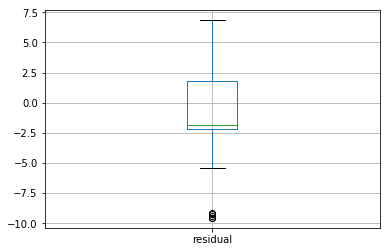

In [234]:
out_data[out_data.branch_code == 'NS'].boxplot('residual')

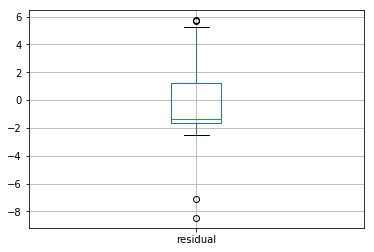

In [235]:
out_data[out_data.branch_code == 'TP'].boxplot('residual')

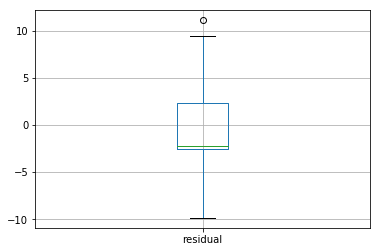

In [237]:
out_data[out_data.branch_code == 'BK'].boxplot('residual')

Now we will try to remove the outliers using IQR methodology over column 'residual'

In [387]:
out_data_ns = out_data[out_data['branch_code']=='NS']
out_data_tp = out_data[out_data['branch_code']=='TP']
out_data_bk = out_data[out_data['branch_code']=='BK']

OUTLIERS FOR BRANCH NS

In [388]:
Q1_NS = out_data_ns['residual'].quantile(0.25)
Q3_NS = out_data_ns['residual'].quantile(0.75)
IQR_NS = Q3_NS-Q1_NS
lower_bound_ns = Q1_NS - 1.5*IQR_NS
upper_bound_ns = Q3_NS + 1.5*IQR_NS

OUTLIERS FOR BRANCH TP

In [389]:
Q1_TP = out_data_tp['residual'].quantile(0.25)
Q3_TP = out_data_tp['residual'].quantile(0.75)
IQR_TP = Q3_TP-Q1_TP
lower_bound_tp = Q1_TP - 1.5*IQR_TP
upper_bound_tp = Q3_TP + 1.5*IQR_TP

OUTLIERS FOR BRANCH BK

In [390]:
Q1_BK = out_data_bk['residual'].quantile(0.25)
Q3_BK = out_data_bk['residual'].quantile(0.75)
IQR_BK = Q3_BK-Q1_BK
lower_bound_bk = Q1_BK - 1.5*IQR_BK
upper_bound_bk = Q3_BK + 1.5*IQR_BK

REMOVING OUTLIER DATA

In [391]:
to_drop_indexes = []
for i in range(len(out_data)):
    each = out_data.iloc[i]
    if each.branch_code == 'NS':
        if each.residual<lower_bound_ns or each.residual>upper_bound_ns:
            to_drop_indexes.append(i)
    elif each.branch_code == 'TP':
        if each.residual<lower_bound_tp or each.residual>upper_bound_tp:
            to_drop_indexes.append(i)
    elif each.branch_code == 'BK':
        if each.residual<lower_bound_bk or each.residual>upper_bound_bk:
            to_drop_indexes.append(i)     

In [392]:
to_drop_indexes

[40, 47, 63, 95, 181, 217, 229, 266, 343, 467]

Our data has in total 10 outlier values as given in the index list above

Now we will try to remove all these index rows from the data frame

In [393]:
out_data.drop(out_data.index[to_drop_indexes], inplace=True)

In [394]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 499
Data columns (total 17 columns):
order_id                   490 non-null object
date                       490 non-null object
time                       490 non-null object
order_type                 490 non-null object
branch_code                490 non-null object
order_items                490 non-null object
order_price                490 non-null float64
customer_lat               490 non-null float64
customer_lon               490 non-null float64
customerHasloyalty?        490 non-null int64
distance_to_customer_KM    490 non-null float64
delivery_fee               490 non-null float64
DayOfWeek                  490 non-null int64
TimeOfDay                  490 non-null int64
new_delivery_fee           490 non-null float64
predicted_delivery_fee     490 non-null float64
residual                   490 non-null float64
dtypes: float64(8), int64(3), object(6)
memory usage: 68.9+ KB


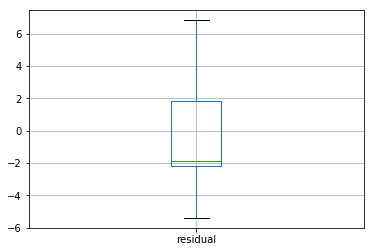

In [247]:
out_data[out_data.branch_code == 'NS'].boxplot('residual')

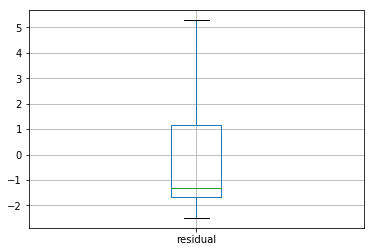

In [248]:
out_data[out_data.branch_code == 'TP'].boxplot('residual')

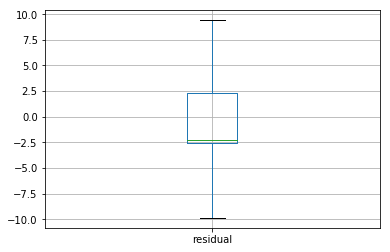

In [249]:
out_data[out_data.branch_code == 'BK'].boxplot('residual')

The boxplots above show that there are no more outliers

**Now we will try to fix the 'customerHasloyalty?' column in our dirty_data dataframe** <br>
**We will use the delivery_fee and linear regression predictions** <br>
Given that : 
* delivery_fee depends upon weekend or weekday as a continous variable
* time of day morning,afternoon or evening as a continous variabe
* distance between branch and customer  <br>
NOTE: The fee depends linearly on all above features but in different ways for each branch

Three models for three branches that we trained earlier: <br>
* linear_model_bk : for branch_code 'BK'
* linear_model_ns : for branch_code 'NS'
* linear_model_tp : for branch_code 'TP'

In [433]:
dirty_data.head(1)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.4,-37.825836,144.984425,0,8.92,12.345871,13,44,47


**Now we will add 'DayOfWeek' and 'TimeOfDay' columns required for testing the model**

In [434]:
def getDayOfWeek(row):
    date = pd.to_datetime(row)
    day = date.dayofweek 
    if day > 4:
        result = 1
    else:
        result = 0
    return result

dirty_data['DayOfWeek'] = dirty_data.apply(lambda x: getDayOfWeek(x['date']), axis =1)

In [435]:
def getTimeOfDay (row):
    if row == "Breakfast":
        result1 = 0
    elif row == "Lunch":
        result1 = 1
    else:
        result1 = 2
    return result1

dirty_data['TimeOfDay'] = dirty_data.apply(lambda x: getTimeOfDay(x['order_type']), axis =1)

In [436]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second,DayOfWeek,TimeOfDay
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.40,-37.825836,144.984425,0,8.920,12.345871,13,44,47,0,1
1,ORDI04117,2018-09-18,16:37:10,Dinner,NS,"[('Fish&Chips', 4), ('Salmon', 2)]",222.00,-37.807924,144.949274,0,8.655,13.999522,16,37,10,0,2
2,ORDX04240,2018-09-12,16:27:02,Dinner,BK,"[('Fish&Chips', 10), ('Pasta', 8)]",570.00,-37.800029,144.999944,0,5.311,12.131518,16,27,2,0,2
3,ORDI00291,2018-07-14,14:25:21,Lunch,NS,"[('Chicken', 10), ('Burger', 9), ('Salad', 4), ('Steak', 9), ('Fries', 4)]",1120.80,-37.822184,144.947702,0,9.951,17.291598,14,25,21,1,1
4,ORDB06629,2018-03-14,10:21:58,Breakfast,TP,"[('Eggs', 6), ('Coffee', 3)]",154.50,-37.799048,144.932417,0,12.321,14.528188,10,21,58,0,0
5,ORDB06077,2018-04-30,11:53:14,Breakfast,TP,"[('Eggs', 7), ('Cereal', 7), ('Pancake', 5), ('Coffee', 8)]",482.25,-37.804690,144.973171,0,9.633,12.367308,11,53,14,0,0
6,ORDY06729,2018-02-12,09:21:07,Breakfast,TP,"[('Pancake', 5), ('Coffee', 5)]",158.75,-37.814050,144.971633,0,8.443,10.983597,9,21,7,0,0
7,ORDZ04723,2018-01-13,08:20:16,Breakfast,NS,"[('Pancake', 5), ('Cereal', 2), ('Coffee', 5), ('Eggs', 4)]",288.75,-37.821512,144.945087,1,10.003,8.445737,8,20,16,1,0
8,ORDY08327,2018-02-13,09:21:07,Breakfast,TP,"[('Eggs', 9), ('Pancake', 7)]",367.75,-37.802918,144.928123,0,11.512,13.676952,9,21,7,0,0
9,ORDC01621,2018-03-07,10:11:49,Breakfast,NS,"[('Eggs', 10), ('Cereal', 5), ('Pancake', 2), ('Coffee', 4)]",403.50,-37.807871,144.973041,0,7.077,12.003806,10,11,49,0,0


In [437]:
dirty_data_ns = dirty_data[dirty_data['branch_code']=='NS'][['DayOfWeek','TimeOfDay','distance_to_customer_KM']]
dirty_data_ns_index = list(dirty_data_ns.index)
dirty_data_tp = dirty_data[dirty_data['branch_code']=='TP'][['DayOfWeek','TimeOfDay','distance_to_customer_KM']]
dirty_data_tp_index = list(dirty_data_tp.index)
dirty_data_bk = dirty_data[dirty_data['branch_code']=='BK'][['DayOfWeek','TimeOfDay','distance_to_customer_KM']]
dirty_data_bk_index = list(dirty_data_bk.index)

In [1]:
# len(prediction_ns)+len(prediction_tp)+len(prediction_bk)

In [2]:
# len(dirty_data_ns_index)+len(dirty_data_tp_index)+len(dirty_data_bk_index)

In [438]:
prediction_ns = linear_model_ns.predict(dirty_data_ns)
prediction_tp = linear_model_tp.predict(dirty_data_tp)
prediction_bk = linear_model_bk.predict(dirty_data_bk)

In [280]:
# prediction_bk

In [439]:
dirty_index_prediction_ns = list(zip(dirty_data_ns_index,prediction_ns))
dirty_index_prediction_tp = list(zip(dirty_data_tp_index,prediction_tp))
dirty_index_prediction_bk = list(zip(dirty_data_bk_index,prediction_bk))

In [446]:
dirty_data['predicted_delivery_fee'] = 0
for each in dirty_index_prediction_ns:
    index,prediction = each
    dirty_data.iloc[index,dirty_data.columns.get_loc('predicted_delivery_fee')] = prediction
for each in dirty_index_prediction_bk:
    index,prediction = each
    dirty_data.iloc[index,dirty_data.columns.get_loc('predicted_delivery_fee')] = prediction
for each in dirty_index_prediction_tp:
    index,prediction = each
    dirty_data.iloc[index,dirty_data.columns.get_loc('predicted_delivery_fee')] = prediction

In [447]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second,DayOfWeek,TimeOfDay,predicted_delivery_fee
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.40,-37.825836,144.984425,0,8.920,12.345871,13,44,47,0,1,13.827882
1,ORDI04117,2018-09-18,16:37:10,Dinner,NS,"[('Fish&Chips', 4), ('Salmon', 2)]",222.00,-37.807924,144.949274,0,8.655,13.999522,16,37,10,0,2,16.661457
2,ORDX04240,2018-09-12,16:27:02,Dinner,BK,"[('Fish&Chips', 10), ('Pasta', 8)]",570.00,-37.800029,144.999944,0,5.311,12.131518,16,27,2,0,2,14.609047
3,ORDI00291,2018-07-14,14:25:21,Lunch,NS,"[('Chicken', 10), ('Burger', 9), ('Salad', 4), ('Steak', 9), ('Fries', 4)]",1120.80,-37.822184,144.947702,0,9.951,17.291598,14,25,21,1,1,15.470217
4,ORDB06629,2018-03-14,10:21:58,Breakfast,TP,"[('Eggs', 6), ('Coffee', 3)]",154.50,-37.799048,144.932417,0,12.321,14.528188,10,21,58,0,0,15.878448
5,ORDB06077,2018-04-30,11:53:14,Breakfast,TP,"[('Eggs', 7), ('Cereal', 7), ('Pancake', 5), ('Coffee', 8)]",482.25,-37.804690,144.973171,0,9.633,12.367308,11,53,14,0,0,13.609425
6,ORDY06729,2018-02-12,09:21:07,Breakfast,TP,"[('Pancake', 5), ('Coffee', 5)]",158.75,-37.814050,144.971633,0,8.443,10.983597,9,21,7,0,0,12.604910
7,ORDZ04723,2018-01-13,08:20:16,Breakfast,NS,"[('Pancake', 5), ('Cereal', 2), ('Coffee', 5), ('Eggs', 4)]",288.75,-37.821512,144.945087,1,10.003,8.445737,8,20,16,1,0,15.040894
8,ORDY08327,2018-02-13,09:21:07,Breakfast,TP,"[('Eggs', 9), ('Pancake', 7)]",367.75,-37.802918,144.928123,0,11.512,13.676952,9,21,7,0,0,15.195546
9,ORDC01621,2018-03-07,10:11:49,Breakfast,NS,"[('Eggs', 10), ('Cereal', 5), ('Pancake', 2), ('Coffee', 4)]",403.50,-37.807871,144.973041,0,7.077,12.003806,10,11,49,0,0,14.107329


In [450]:
dirty_data['dirty_error'] = round(dirty_data['delivery_fee']/dirty_data['predicted_delivery_fee'],2)

In [451]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second,DayOfWeek,TimeOfDay,predicted_delivery_fee,dirty_error
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.40,-37.825836,144.984425,0,8.920,12.345871,13,44,47,0,1,13.827882,0.89
1,ORDI04117,2018-09-18,16:37:10,Dinner,NS,"[('Fish&Chips', 4), ('Salmon', 2)]",222.00,-37.807924,144.949274,0,8.655,13.999522,16,37,10,0,2,16.661457,0.84
2,ORDX04240,2018-09-12,16:27:02,Dinner,BK,"[('Fish&Chips', 10), ('Pasta', 8)]",570.00,-37.800029,144.999944,0,5.311,12.131518,16,27,2,0,2,14.609047,0.83
3,ORDI00291,2018-07-14,14:25:21,Lunch,NS,"[('Chicken', 10), ('Burger', 9), ('Salad', 4), ('Steak', 9), ('Fries', 4)]",1120.80,-37.822184,144.947702,0,9.951,17.291598,14,25,21,1,1,15.470217,1.12
4,ORDB06629,2018-03-14,10:21:58,Breakfast,TP,"[('Eggs', 6), ('Coffee', 3)]",154.50,-37.799048,144.932417,0,12.321,14.528188,10,21,58,0,0,15.878448,0.91
5,ORDB06077,2018-04-30,11:53:14,Breakfast,TP,"[('Eggs', 7), ('Cereal', 7), ('Pancake', 5), ('Coffee', 8)]",482.25,-37.804690,144.973171,0,9.633,12.367308,11,53,14,0,0,13.609425,0.91
6,ORDY06729,2018-02-12,09:21:07,Breakfast,TP,"[('Pancake', 5), ('Coffee', 5)]",158.75,-37.814050,144.971633,0,8.443,10.983597,9,21,7,0,0,12.604910,0.87
7,ORDZ04723,2018-01-13,08:20:16,Breakfast,NS,"[('Pancake', 5), ('Cereal', 2), ('Coffee', 5), ('Eggs', 4)]",288.75,-37.821512,144.945087,1,10.003,8.445737,8,20,16,1,0,15.040894,0.56
8,ORDY08327,2018-02-13,09:21:07,Breakfast,TP,"[('Eggs', 9), ('Pancake', 7)]",367.75,-37.802918,144.928123,0,11.512,13.676952,9,21,7,0,0,15.195546,0.90
9,ORDC01621,2018-03-07,10:11:49,Breakfast,NS,"[('Eggs', 10), ('Cereal', 5), ('Pancake', 2), ('Coffee', 4)]",403.50,-37.807871,144.973041,0,7.077,12.003806,10,11,49,0,0,14.107329,0.85


In [453]:
for i in range(len(dirty_data)):
    error = dirty_data.dirty_error[i]
    if error >=0.4 and error <=0.6:
        dirty_data.iloc[i,dirty_data.columns.get_loc('customerHasloyalty?')] = 1
    else:
        dirty_data.iloc[i,dirty_data.columns.get_loc('customerHasloyalty?')] = 0

In [455]:
dirty_data['customerHasloyalty?'].value_counts()

0    483
1    17 
Name: customerHasloyalty?, dtype: int64

In [456]:
dirty_data.head(1)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,hour,minute,second,DayOfWeek,TimeOfDay,predicted_delivery_fee,dirty_error
0,ORDY01942,2018-06-26,13:44:47,Lunch,TP,"[('Steak', 10), ('Fries', 4), ('Chicken', 8), ('Salad', 7)]",874.4,-37.825836,144.984425,0,8.92,12.345871,13,44,47,0,1,13.827882,0.89


Now we will drop the added columns that we used for regressional computations

In [459]:
dirty_data.drop(['hour','minute','second','DayOfWeek','predicted_delivery_fee','TimeOfDay','dirty_error'],inplace=True,axis=1)

In [463]:
out_data.drop(['DayOfWeek','predicted_delivery_fee','TimeOfDay','residual','new_delivery_fee'],inplace=True,axis=1)

In [469]:
missing_data.drop(['day_of_week','TimeOfDay','new_delivery_fee'],inplace=True,axis=1)

In [474]:
dirty_data.to_csv('Group055_dirty_data_solution.csv',index=False)

In [475]:
out_data.to_csv('Group055_outlier_data_solution.csv',index=False)

In [476]:
missing_data.to_csv('Group055_missing_data_solution.csv',index=False)